In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage.color import label2rgb
from skimage.measure import label

orig_img='/nfs2/baos1/rudravg/DeepCell_Results/GCA075ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif'
new_img='/nfs2/baos1/rudravg//DeepCell_Results/GCA075ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_17_initial_reg.tif'

mask='/nfs2/baos1/rudravg/Retention_Masks/GCA075ACB_TISSUE01_TISSUE_RETENTION.tif'
orig_img=np.array(Image.open(orig_img))
new_img=np.array(Image.open(new_img))
mask=np.array(Image.open(mask))
mask = (mask > 0).astype(int)
orig_img=orig_img*mask
new_img=new_img*mask


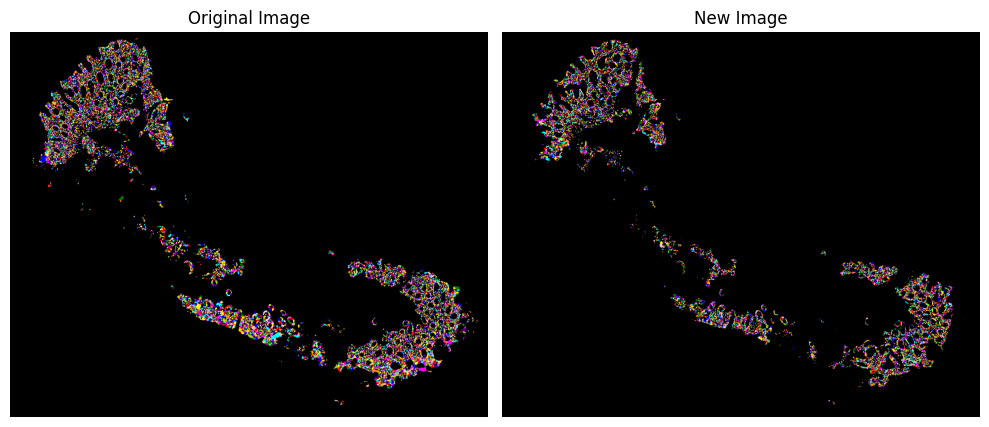

In [32]:
labeled_img = label(orig_img)
colored_img = label2rgb(labeled_img, bg_label=0)
labeled_img1 = label(new_img)
colored_img1 = label2rgb(labeled_img1, bg_label=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(colored_img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the second colored image in the second subplot
ax[1].imshow(colored_img1)
ax[1].set_title('New Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [33]:
#Print the number of labels
print('Number of labels:', labeled_img.max())
print('Number of labels:', labeled_img1.max())

Number of labels: 18110
Number of labels: 13791


In [35]:
from scipy.ndimage import distance_transform_edt
from tqdm import tqdm
from multiprocessing import Pool
def calculate_minimum_distance(label1):
    # Create binary images for the current label
    binary_img1 = (labeled_img1 == label1)
    binary_img = (labeled_img > 0)

    # Calculate the distance transform of the binary image
    dt = distance_transform_edt(~binary_img)

    # Calculate the minimum distance to the other image for the current label
    min_distance = np.min(dt[binary_img1])

    return min_distance

def calculate_mean_minimum_distance(labeled_img, labeled_img1):
    unique_labels1 = np.unique(labeled_img1)
    unique_labels1 = unique_labels1[unique_labels1 != 0]  # Exclude background

    # Create a pool of worker processes
    pool = Pool()

    # Use parallel processing to calculate minimum distances
    min_distances = list(tqdm(pool.imap(calculate_minimum_distance, unique_labels1), total=len(unique_labels1), desc="Calculating minimum distances"))

    # Close the pool of worker processes
    pool.close()
    pool.join()

    # Calculate the mean of the minimum distances
    mean_minimum_distance = np.mean(min_distances)

    return mean_minimum_distance

mean_minimum_distance = calculate_mean_minimum_distance(labeled_img, labeled_img1)
print(f"Mean minimum distance: {mean_minimum_distance}")

Calculating minimum distances: 100%|██████████| 13791/13791 [1:59:33<00:00,  1.92it/s]  

Mean minimum distance: 0.19600274417133637
